In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np
from tqdm import tqdm
import pandas as pd

# Label EDA

In [20]:
label = pd.read_csv('../data/label.csv', index_col=0)

In [21]:
mtat = label[label['data_origin']== 1]
gtzan = label[label['data_origin']== 0]

### mtat

In [22]:
mtat.head()

,singer,duet,plucking,world,bongos,harpsichord,sitar,chorus,female opera,clarinet,...,noise,choir,rap,hiphop,water,baroque,fiddle,english,filepath,data_origin
0,False,0,0,0,0,False,0,0,0,0,...,0,False,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...,1
1,False,0,0,0,0,False,0,0,0,0,...,0,False,0,0,0,1,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...,1
2,False,0,0,0,0,False,0,0,0,0,...,0,False,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...,1
3,False,0,0,0,0,False,0,0,0,0,...,0,False,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...,1
4,False,0,0,0,0,False,0,0,0,0,...,0,False,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...,1


In [23]:
mtat = mtat.drop(['data_origin'], axis=1)

In [24]:
mtat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25863 entries, 0 to 25862
Columns: 135 entries, singer to filepath
dtypes: bool(29), int64(105), object(1)
memory usage: 21.8+ MB


Checking the distribution of the number of labels per row

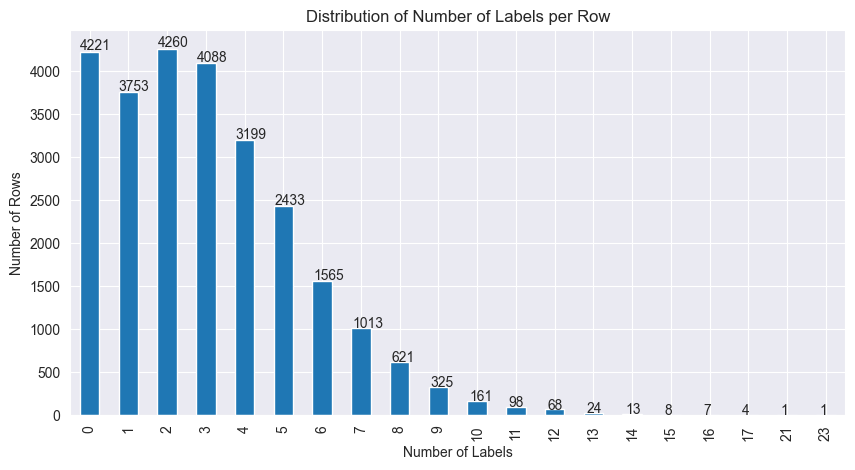

In [25]:
# Count the number of labels per row
label_counts_per_row = mtat.iloc[:,:-1].sum(axis=1)

# Count the frequency of rows with 'n' labels
rows_with_n_labels = label_counts_per_row.value_counts().sort_index()

# Plotting the distribution of 'n' labels
plt.figure(figsize=(10, 5))
bars = rows_with_n_labels.plot(kind='bar')
plt.title('Distribution of Number of Labels per Row')
plt.xlabel('Number of Labels')
plt.ylabel('Number of Rows')

# Add text annotations
for p in bars.patches:
    bars.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

In [26]:
# Calculate the sum of labels for each row
row_label_sum = mtat.iloc[:, :-1].sum(axis=1)  # Adjust the slice as needed

# Filter rows where the sum of labels is zero
rows_with_no_labels = mtat[row_label_sum == 0]
rows_with_no_labels


,singer,duet,plucking,world,bongos,harpsichord,sitar,chorus,female opera,clarinet,...,soft,noise,choir,rap,hiphop,water,baroque,fiddle,english,filepath
6,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/c/lvx_nova-lvx_nova-01-contimune-175-204.mp3
9,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/0/american_bach_soloists-j_s__bach__canta...
13,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/f/the_headroom_project-jetuton_andawai-01...
25,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/9/american_bach_soloists-heinrich_schutz_...
26,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/9/american_bach_soloists-heinrich_schutz_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25812,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/9/american_baroque-dances_and_suites_of_r...
25823,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/8/jacob_heringman-blame_not_my_lute-34-th...
25832,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/3/musica_franca-boismortier__sonatas_for_...
25833,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/3/musica_franca-boismortier__sonatas_for_...


In [27]:
# delete rows with 0 label
mtat = mtat[row_label_sum != 0]

In [28]:
mtat.shape

(21642, 135)

Checking the distribution of label

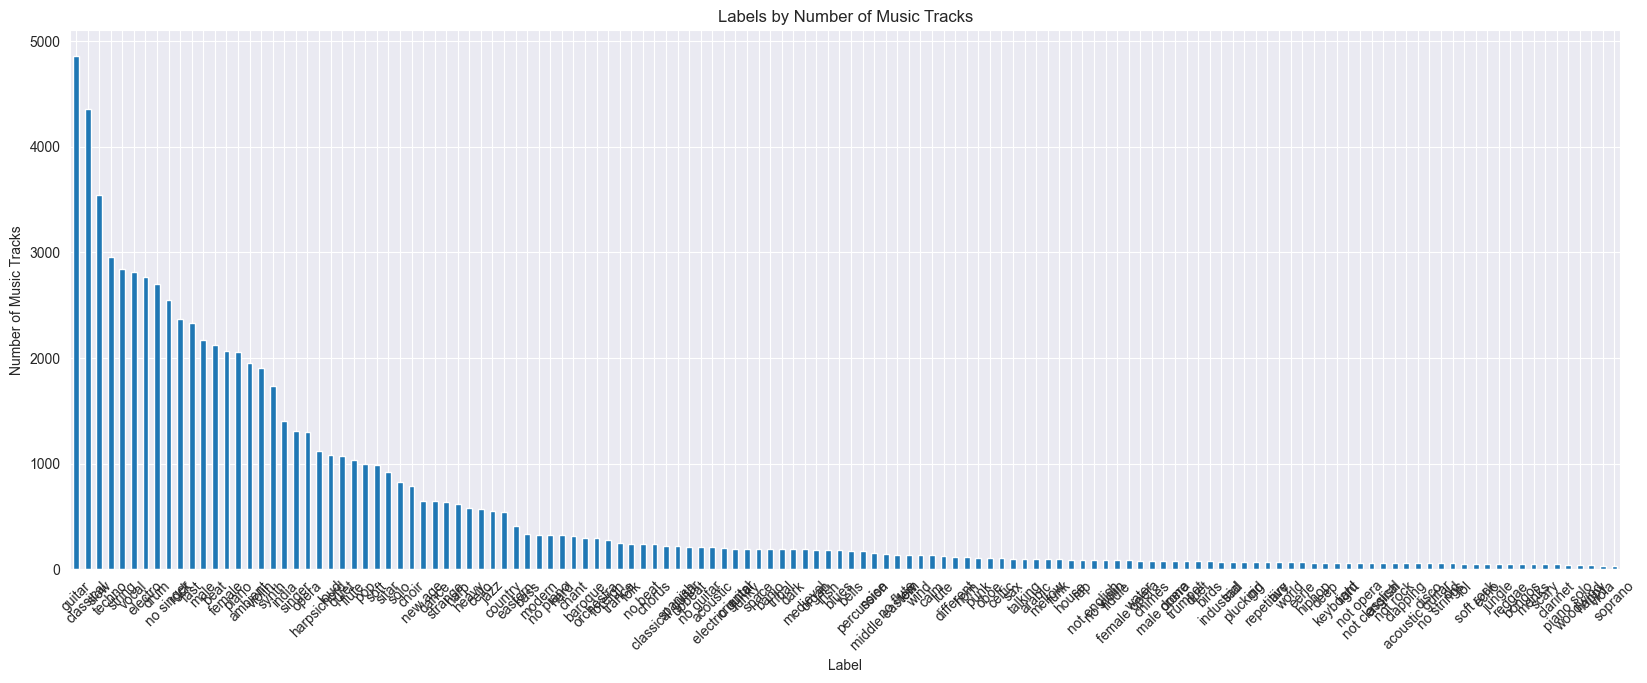

In [29]:
# Count the number of rows with each label
label_counts = mtat.iloc[:,:-1].sum(axis=0)
# Plot only the top 20 most common labels
# top_label_counts = label_counts.nlargest(50)

plt.figure(figsize=(20, 7))  # Adjust figure size as needed
bars = label_counts.sort_values(ascending=False).plot(kind='bar')  

plt.title('Labels by Number of Music Tracks')
plt.xticks(rotation=45)  # A slight rotation can sometimes help with readability
plt.ylabel('Number of Music Tracks')
plt.xlabel('Label')

plt.show()


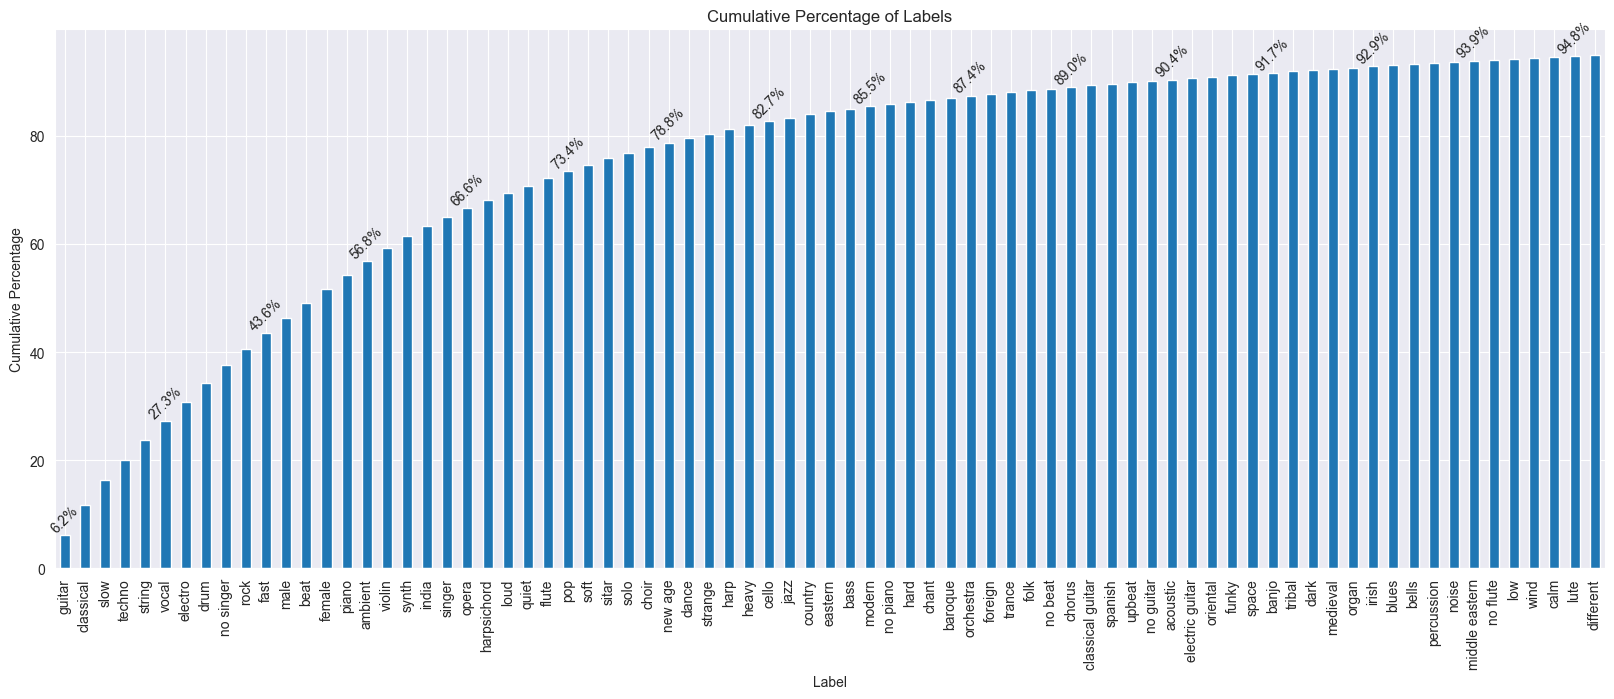

In [30]:

# Count the number of rows with each label
label_counts = mtat.iloc[:,:-1].sum(axis=0)

# Calculate cumulative percentage of the total labels
label_counts_sorted = label_counts.sort_values(ascending=False)
cumulative_percentage = label_counts_sorted.cumsum() / label_counts_sorted.sum() * 100

# Find the last index where cumulative percentage is less than or equal to 80
last_index = cumulative_percentage[cumulative_percentage <= 95].last_valid_index()

# Slice the cumulative_percentage to include only up to the last index where cumulative percentage is less than or equal to 80
cumulative_percentage_limited = cumulative_percentage.loc[:last_index]

plt.figure(figsize=(20, 7))  # Adjust figure size as needed
cumulative_percentage_limited.plot(kind='bar')

plt.title('Cumulative Percentage of Labels')
plt.xticks(rotation=90)  # Rotate the labels for better visibility
plt.ylabel('Cumulative Percentage')
plt.xlabel('Label')

# Add the cumulative percentage text above every 5 bars
for i, value in enumerate(cumulative_percentage_limited):
    if i % 5 == 0:  # Only label every 5th bar
        plt.text(i, value, f"{value:.1f}%", ha='center', va='bottom', rotation=45)


# Show the plot
plt.show()

In [31]:
# Check how many label it takes to reach 80% of the total count
for i in [80,85,90,95,98,99]:
    print(f'{i}% : {cumulative_percentage[cumulative_percentage<i].count()} labels')

80% : 32 labels
85% : 39 labels
90% : 54 labels
95% : 77 labels
98% : 104 labels
99% : 117 labels


In [32]:
# Find the last index where cumulative percentage is less than or equal to 95
last_index = cumulative_percentage[cumulative_percentage <= 95].last_valid_index()
# Slice the cumulative_percentage to include only up to the last index where cumulative percentage is less than or equal to 90
cumulative_percentage_limited = cumulative_percentage.loc[:last_index]

# First, we find the labels that make up to 80% of the cumulative percentage.
mtat_95 = cumulative_percentage_limited.index.tolist()
mtat_5 = cumulative_percentage.loc[last_index:].index.tolist()
# Display the list of labels outside of the top 90%

print(f'labels_outside_90%', mtat_5)
print()
print(f'labels_upto_90%', mtat_95)


labels_outside_90% ['different', 'horn', 'punk', 'oboe', 'celtic', 'sax', 'talking', 'arabic', 'mellow', 'funk', 'house', 'rap', 'not english', 'no violin', 'fiddle', 'female opera', 'water', 'chimes', 'male opera', 'drone', 'trumpet', 'duet', 'birds', 'industrial', 'sad', 'plucking', 'girl', 'repetitive', 'airy', 'world', 'eerie', 'hiphop', 'deep', 'keyboard', 'light', 'not opera', 'not classical', 'english', 'not rock', 'clapping', 'acoustic guitar', 'disco', 'no strings', 'old', 'lol', 'soft rock', 'echo', 'jungle', 'reggae', 'bongos', 'monks', 'scary', 'clarinet', 'piano solo', 'woodwind', 'happy', 'viola', 'soprano']

labels_upto_90% ['guitar', 'classical', 'slow', 'techno', 'string', 'vocal', 'electro', 'drum', 'no singer', 'rock', 'fast', 'male', 'beat', 'female', 'piano', 'ambient', 'violin', 'synth', 'india', 'singer', 'opera', 'harpsichord', 'loud', 'quiet', 'flute', 'pop', 'soft', 'sitar', 'solo', 'choir', 'new age', 'dance', 'strange', 'harp', 'heavy', 'cello', 'jazz', 'cou

In [33]:
mtat_filtered = mtat.loc[mtat[mtat_95].sum(axis=1) >= 1, mtat_95 + ['filepath']]
mtat_filtered.info()  # Display the info of the filtered dataframe to verify

<class 'pandas.core.frame.DataFrame'>
Index: 21520 entries, 0 to 25862
Data columns (total 78 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   guitar            21520 non-null  bool  
 1   classical         21520 non-null  bool  
 2   slow              21520 non-null  int64 
 3   techno            21520 non-null  int64 
 4   string            21520 non-null  bool  
 5   vocal             21520 non-null  bool  
 6   electro           21520 non-null  bool  
 7   drum              21520 non-null  bool  
 8   no singer         21520 non-null  bool  
 9   rock              21520 non-null  int64 
 10  fast              21520 non-null  bool  
 11  male              21520 non-null  bool  
 12  beat              21520 non-null  bool  
 13  female            21520 non-null  bool  
 14  piano             21520 non-null  int64 
 15  ambient           21520 non-null  int64 
 16  violin            21520 non-null  bool  
 17  synth            

### Gtzan

In [175]:
gtzan.head()

,singer,duet,plucking,world,bongos,harpsichord,sitar,chorus,female opera,clarinet,...,noise,choir,rap,hiphop,water,baroque,fiddle,english,filepath,data_origin
25863,False,0,0,0,0,False,0,0,0,0,...,0,False,0,0,0,0,0,0,gtzan/genres_original/blues/blues.00000.wav,0
25864,False,0,0,0,0,False,0,0,0,0,...,0,False,0,0,0,0,0,0,gtzan/genres_original/blues/blues.00001.wav,0
25865,False,0,0,0,0,False,0,0,0,0,...,0,False,0,0,0,0,0,0,gtzan/genres_original/blues/blues.00002.wav,0
25866,False,0,0,0,0,False,0,0,0,0,...,0,False,0,0,0,0,0,0,gtzan/genres_original/blues/blues.00003.wav,0
25867,False,0,0,0,0,False,0,0,0,0,...,0,False,0,0,0,0,0,0,gtzan/genres_original/blues/blues.00004.wav,0


In [176]:
gtzan = gtzan.loc[:, (gtzan != 0).any(axis=0)]

In [177]:
gtzan.head()

,heavy,classical,jazz,country,reggae,disco,pop,blues,rock,hiphop,filepath
25863,False,False,False,0,0,0,0,1,0,0,gtzan/genres_original/blues/blues.00000.wav
25864,False,False,False,0,0,0,0,1,0,0,gtzan/genres_original/blues/blues.00001.wav
25865,False,False,False,0,0,0,0,1,0,0,gtzan/genres_original/blues/blues.00002.wav
25866,False,False,False,0,0,0,0,1,0,0,gtzan/genres_original/blues/blues.00003.wav
25867,False,False,False,0,0,0,0,1,0,0,gtzan/genres_original/blues/blues.00004.wav


In [178]:
# check class imbalance
gtzan.sum(axis=0)

heavy                                                      100
classical                                                  100
jazz                                                       100
country                                                    100
reggae                                                     100
disco                                                      100
pop                                                        100
blues                                                      100
rock                                                       100
hiphop                                                     100
filepath     gtzan/genres_original/blues/blues.00000.wavgtz...
dtype: object

# Audio EDA

In [36]:
# Load the audio file
# AUDIO_FILE = '../data/gtzan/genres_original/jazz/jazz.00000.wav'
AUDIO_FILE = '../data/mtat/6/barry_phillips-trad-01-polska_fran_glava-0-29.mp3'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)

AttributeError: module 'soundfile' has no attribute 'SoundFileRuntimeError'

In [ ]:
# waveform 
plt.figure(figsize=(14,5))
librosa.display.waveshow(samples, sr=sample_rate)

In [200]:
Audio(AUDIO_FILE)

In [57]:
if samples.ndim == 1:
    print('mono')
else:
    print(f'{samples.shape[0]} Channels')

mono


In [58]:
# Get the size of the audio file in time (seconds)
print(librosa.get_duration(y=samples, sr=sample_rate))

29.124


C:\Users\syeon\AppData\Local\Temp\ipykernel_24052\2803378968.py:2: UserWarning:

Trying to display complex-valued input. Showing magnitude instead.



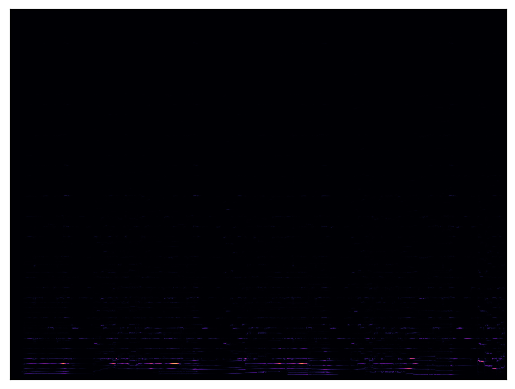

In [60]:
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)                         

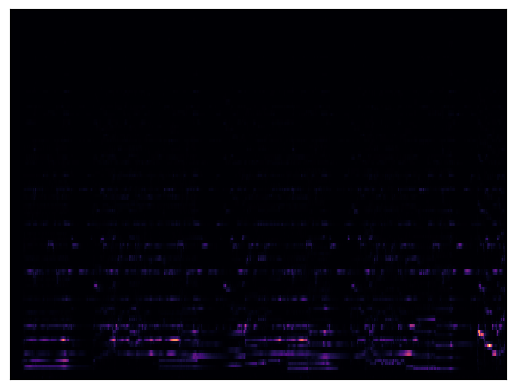

In [61]:
# use the mel-scale+decibel instead of raw frequency
sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)  

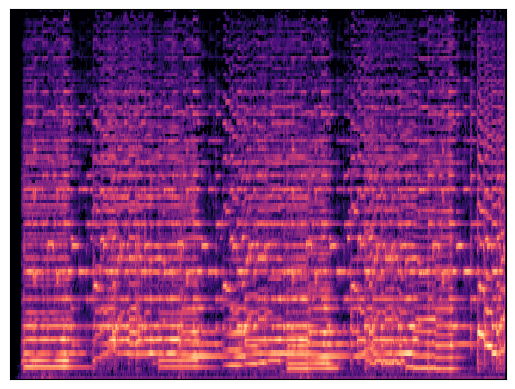

In [62]:
# Convert the Mel spectrogram to the log Mel spectrogram 
# Basically using dB values for amplitude
log_mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.max)
librosa.display.specshow(log_mel_sgram)  

Iterate all data

In [150]:
def create_metadata(audio_file):
    root_dir = '../data/'
    AUDIO_FILE = root_dir+audio_file
    samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)
    
    # Get channel count
    channels = 1 if samples.ndim == 1 else samples.shape[0]

    duration = librosa.get_duration(y=samples, sr=sample_rate)
    
    return sample_rate, channels, duration

In [70]:
# Initialize an empty list to store the data
metadata = []
error_files = []  # List to store paths of problematic files

# Iterate over the filepaths in the subset DataFrame
for file in tqdm(mtat['filepath'], desc='Processing audio files'):
    try:
        sample_rate, channels, duration = create_metadata(file)
        # Create a dictionary of the data you want to store
        audio_info = {
            'filepath': file,
            'audio_channels': channels, 
            'sampling_rate': sample_rate,
            'audio_length': duration,
            # Add more features if needed
        }
        # Append the dictionary to your list
        metadata.append(audio_info)

    except Exception as e: 
        print(f"Failed to process {file}: {e}")  # Corrected to use 'file' instead of 'value'
        error_files.append({'filepath': file, 'error': str(e)})

# Convert the list of dictionaries to a new DataFrame
metadata_df = pd.DataFrame(metadata)
error_df = pd.DataFrame(error_files)

Processing audio files:  60%|█████▉    | 13517/22642 [04:02<02:40, 56.77it/s]C:\Users\syeon\AppData\Local\Temp\ipykernel_24052\1044205948.py:4: UserWarning:

PySoundFile failed. Trying audioread instead.

C:\Users\syeon\Google Drive\CBS\ITU_AdvancedML\venv\Lib\site-packages\librosa\core\audio.py:183: FutureWarning:

librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.

Processing audio files:  60%|█████▉    | 13524/22642 [04:02<02:32, 59.71it/s]

Failed to process mtat/6/norine_braun-now_and_zen-08-gently-117-146.mp3: 


Processing audio files:  92%|█████████▏| 20804/22642 [06:41<00:32, 56.36it/s]

Failed to process mtat/8/jacob_heringman-josquin_des_prez_lute_settings-19-gintzler__pater_noster-204-233.mp3: 


Processing audio files:  94%|█████████▍| 21381/22642 [06:52<00:22, 56.30it/s]

Failed to process mtat/9/american_baroque-dances_and_suites_of_rameau_and_couperin-25-le_petit_rien_xiveme_ordre_couperin-88-117.mp3: 


Processing audio files:  98%|█████████▊| 22212/22642 [07:02<00:03, 107.94it/s]

Failed to process gtzan/genres_original/jazz/jazz.00054.wav: 


Processing audio files: 100%|██████████| 22642/22642 [07:06<00:00, 53.06it/s] 


In [72]:
error_df

,filepath,error
0,mtat/6/norine_braun-now_and_zen-08-gently-117-...,
1,mtat/8/jacob_heringman-josquin_des_prez_lute_s...,
2,mtat/9/american_baroque-dances_and_suites_of_r...,
3,gtzan/genres_original/jazz/jazz.00054.wav,


In [73]:
Audio('../data/gtzan/genres_original/jazz/jazz.00054.wav')

In [77]:
# delete those from the label data
error_file_set = set(error_df['filepath'])
label  = label[~label['filepath'].isin(error_file_set)]

In [71]:
metadata_df

,filepath,audio_channels,sampling_rate,audio_length
0,mtat/f/american_bach_soloists-j_s__bach_solo_c...,1,16000,29.124000
1,mtat/f/american_bach_soloists-j_s__bach_solo_c...,1,16000,29.124000
2,mtat/f/american_bach_soloists-j_s__bach_solo_c...,1,16000,29.124000
3,mtat/f/american_bach_soloists-j_s__bach_solo_c...,1,16000,29.124000
4,mtat/f/american_bach_soloists-j_s__bach_solo_c...,1,16000,29.124000
...,...,...,...,...
22633,gtzan/genres_original/rock/rock.00095.wav,1,22050,30.013333
22634,gtzan/genres_original/rock/rock.00096.wav,1,22050,30.013333
22635,gtzan/genres_original/rock/rock.00097.wav,1,22050,30.013333
22636,gtzan/genres_original/rock/rock.00098.wav,1,22050,30.013333


In [74]:
metadata_df.audio_channels.value_counts()
# only mono data

audio_channels
1    22638
Name: count, dtype: int64

In [75]:
metadata_df.sampling_rate.value_counts()

sampling_rate
16000    21639
22050      999
Name: count, dtype: int64

In [76]:
metadata_df.audio_length.value_counts()
# we need standardizing audio length

audio_length
29.124000    21639
30.013333      640
30.000181      295
30.648889       10
29.995828        5
30.007982        4
30.011791        4
30.370975        3
30.171429        3
30.291156        3
30.351020        3
30.241270        2
30.301134        2
30.081633        2
29.992925        2
30.091610        2
30.021769        1
30.480726        1
30.201361        1
30.271202        1
30.000000        1
30.400907        1
30.281179        1
29.931973        1
30.121542        1
30.131519        1
30.161451        1
30.211338        1
30.101587        1
29.981859        1
30.331066        1
30.071655        1
30.488980        1
30.390930        1
30.360998        1
Name: count, dtype: int64

# Data Augmentation

In [183]:
import muda
import jams

In [184]:
mtat.head()

,singer,duet,plucking,world,bongos,harpsichord,sitar,chorus,female opera,clarinet,...,soft,noise,choir,rap,hiphop,water,baroque,fiddle,english,filepath
0,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...
1,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,1,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...
2,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...
3,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...
4,False,0,0,0,0,False,0,0,0,0,...,0,0,False,0,0,0,0,0,0,mtat/f/american_bach_soloists-j_s__bach_solo_c...


In [190]:
filepath = 'mtat/3/american_baroque-mozart_4_quartets_for_strings_and_winds-01-oboe_quartet_in_f_k370__allegro-0-29.mp3'

In [192]:
Audio('../data/'+filepath)

In [191]:
mtat[mtat['filepath']==filepath]

,singer,duet,plucking,world,bongos,harpsichord,sitar,chorus,female opera,clarinet,...,soft,noise,choir,rap,hiphop,water,baroque,fiddle,english,filepath
1426,False,0,0,0,0,False,0,0,0,1,...,0,0,False,0,0,0,0,0,0,mtat/3/american_baroque-mozart_4_quartets_for_...


In [195]:
# Define a simple pitch shift deformation
pitch_shifter = muda.deformers.LinearPitchShift(n_samples=5, lower=-1, upper=1)

# Define a simple time stretching deformation
time_stretcher = muda.deformers.RandomTimeStretch(n_samples=5)


In [197]:

# Load an example file into a JAMS object
# Replace 'your_audio_file.wav' with the actual file path and filename
j_orig = jams.load('../data/'+filepath)  # You may need to create a JAMS from your WAV first`

ParameterError: Unknown JAMS extension format: "mp3"

In [197]:

y, sr = librosa.load(j_orig.file_metadata.duration, sr=None)  # Load the wave file associated with this JAMS

# Apply pitch shift
for i, jam_out in enumerate(pitch_shifter.transform(j_orig)):
    # Save the augmented audio to disk
    outfile = f'pitch_shifted_{i}.wav'
    librosa.output.write_wav(outfile, jam_out.sandbox.muda._audio['y'], sr)
    print(f'Saved: {outfile}')

# Apply time stretching
for i, jam_out in enumerate(time_stretcher.transform(j_orig)):
    # Save the augmented audio to disk
    outfile = f'time_stretched_{i}.wav'
    librosa.output.write_wav(outfile, jam_out.sandbox.muda._audio['y'], sr)
    print(f'Saved: {outfile}')